South Africa World Cup 2010:


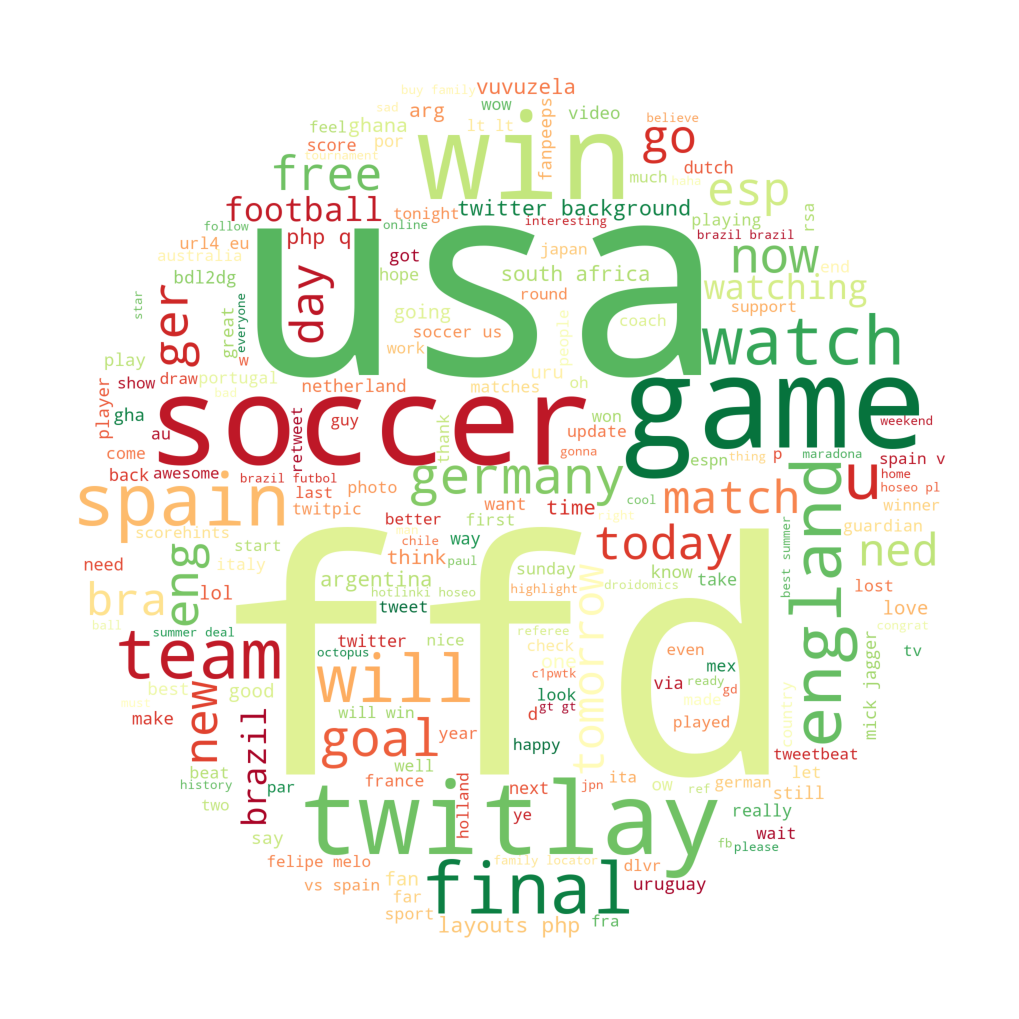

Brazil World Cup 2014:


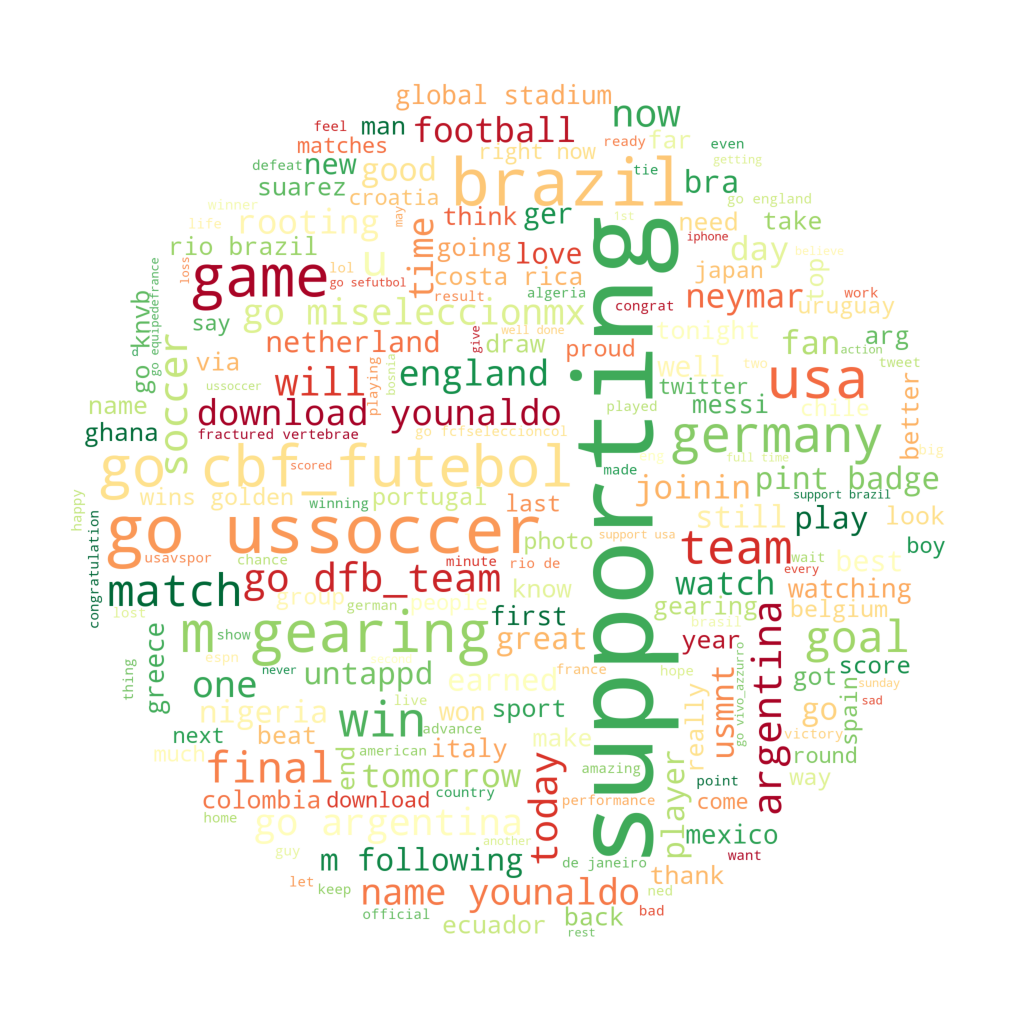

Russia World Cup 2018:


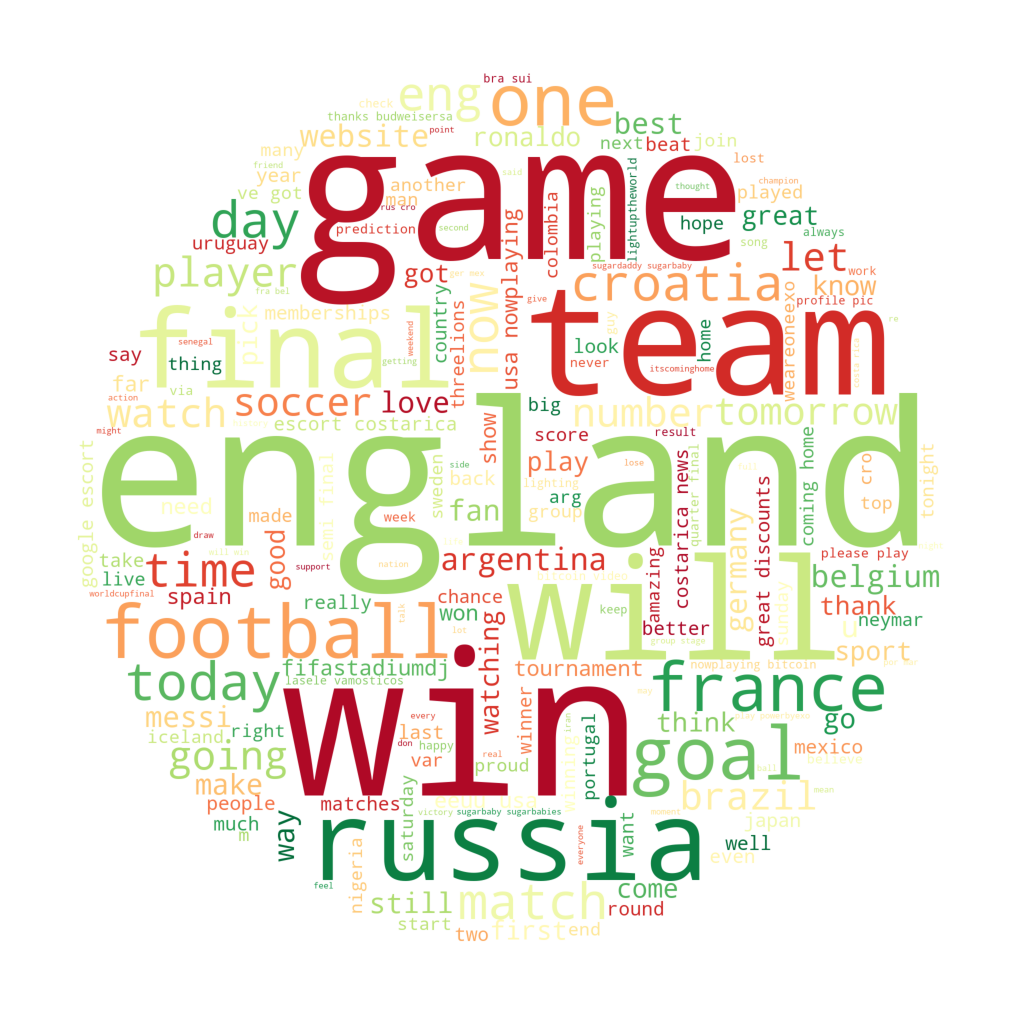

Qatar World Cup 2022:


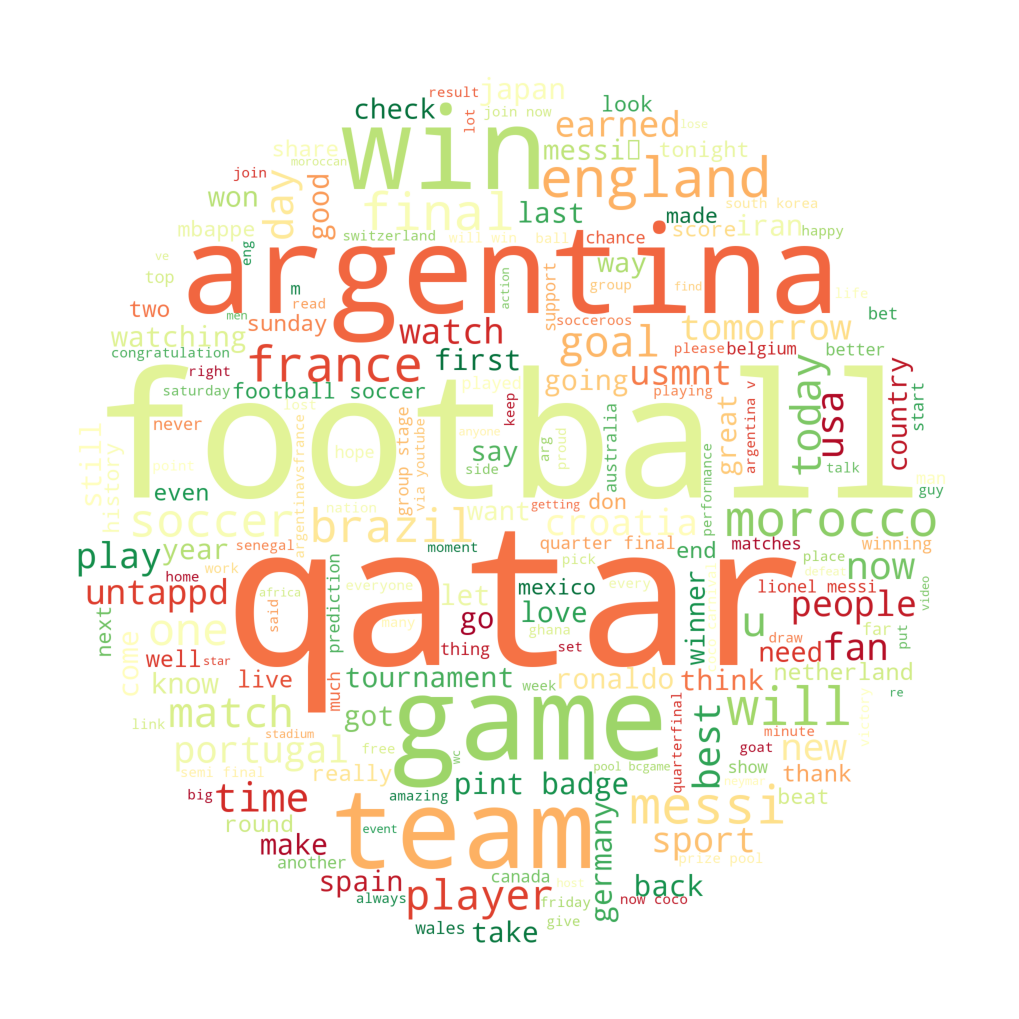

In [2]:
"""
Twittermometer©
Python version 3.9

Project for the Python Programming module of the Data Analyst program (DA24STO) at Hyper Island Stockholm.

Authors:
Anna Högman - https://github.com/annahogman
Guilherme Bracco - https://github.com/guibracco
Yifan Yang - https://github.com/yifan611

Description:
Twittermometer© aims to gauge the general sentiment expressed on Twitter, during the last four FIFA World
Cups events (South Africa in 2010, Brazil in 2014, Russia in 2018 and Qatar in 2022), by visualising the
most used English words in tweets marked with the hashtag #worldcup. Only the last four championships can
be searched because Twitter was not yet comercially available before that.

Unfortunately, tweepy, the popular Twitter module, cannot be used, as of today even enterprise API access
only provides data from the previous 30 days. Therefore, we are using the snscrape module, which doesn't
have a limit of number of days or tweets.

To set the scope and get a more distributed sample of tweets, the script scrapes a fixed number of tweets
per day for each championship period. With 500 tweets per day, it's hard to predict runtime, as the same
script run for 7 hours, 8 hours and 66 minutes in the last three executions. That must be due to server
response — busy servers, throttled search, cached queries? As expected, changing the number of tweets per
day shifts the frequency of the words.

For visualisation, the wordcloud module is chosen. It cannot be installed for Python 3.10 and above, so
Python 3.9 is selected. Aside from common stop words already provided by the module, like conjunctions
and prepositions, some words are excluded from the visualisation because they are too obvious and of no
consequence for the purpose of the script.
"""


import snscrape.modules.twitter as sntwitter
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import wordcloud
from PIL import Image


# Function that iterates over the date range
def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + datetime.timedelta(n)


# Function that gets the tweets and returns them in a list
# Gets {amount_tweets} per day using daterange()
def get_tweets(keywords, start_date, end_date, amount_tweets):

    attributes_container = []

    for single_date in date_range(start_date, end_date):
        t1 = single_date.strftime("%Y-%m-%d")
        t2 = (single_date + datetime.timedelta(1)).strftime("%Y-%m-%d")

        # Gets the tweets until it reaches {amount_tweets}
        for i, tweet in enumerate(
            sntwitter.TwitterSearchScraper(
                keywords + " lang:en since:" + t1 + " until:" + t2
            ).get_items()
        ):

            if i > amount_tweets:
                break
            
            # The data fields retrieved by snscrape
            attributes_container.append(
                [
                    tweet.user.username,
                    # tweet.user.verified,
                    # tweet.user.created,
                    tweet.user.followersCount,
                    # tweet.user.friendsCount,
                    # tweet.retweetCount,
                    tweet.lang,
                    tweet.date,
                    # tweet.likeCount,
                    tweet.sourceLabel,
                    # tweet.id,
                    tweet.content, # Depending on snscrape version, that's tweet.rawContent
                    tweet.hashtags,
                    # tweet.conversationId,
                    # tweet.inReplyToUser,
                    # tweet.coordinates,
                    tweet.place,
                ]
            )
    return attributes_container


# Function that converts the list of tweets to a dataframe and exports it to a CSV file named by country
def get_csv_df(tweets, country):
    df = pd.DataFrame(
        tweets,
        columns=[
            "User",
            # "verified",
            # "Date_Created",
            "Follows_Count",
            # "Friends_Count",
            # "Retweet_Count",
            "Language",
            "Date_Tweet",
            # "Number_of_Likes",
            "Source_of_Tweet",
            # "Tweet_Id",
            "Tweet",
            "Hashtags",
            # "Conversation_Id",
            # "In_reply_To",
            # "Coordinates",
            "Place",
        ],
    )

    df.to_csv("Data-"+ country +".csv")
    return df


# Function that calls the visualisation module
def visualisation_wordcloud(df, country):

    comment_words = ""
    stopwords = set(wordcloud.STOPWORDS)

    # Extra words that need to be filtered
    more_stopwords = {
        "https",
        "t",
        "co",
        "worldcup",
        "fifaworldcup",
        "fifaworldcup2010",
        "fifaworldcup2014",
        "fifaworldcup2018",
        "fifaworldcup2022",
        "qatar2022",
        "S",
        "see",
        "world",
        "cup",
        "amp",
        "bit", "ly",
        "tinyurl",
        "tiny", "cc",
        "fifacom",
        "fifa",
        "2010",
        "2014",
        "2018",
        "2022",
        "southafrica2010",
        "brazil2014",
        "brasil2014",
        "russia2018",
        "qatar2022",
        "rt",
        "worldcup2010",
        "worldcup2014",
        "worldcup2018",
        "worldcup2022",
        "worldcup2010southafrica",
        "worldcup2014brazil",
        "worldcup2018russia",
        "worldcup2022qatar",
        "wc2010",
        "wc2014",
        "wc2018",
        "wc2022",
        "wc10",
        "wc14",
        "wc18",
        "wc22",
        "worldcupqatar2022",
        "worldcuprussia2018",
        "worldcupbrazil2014",
        "worldcupsouthafrica2010",
        "fifaworldcupqatar2022",
        "fifaworldcuprussia2018",
        "fifaworldcupbrazil2014",
        "fifaworldcupsouthafrica2010",
        "qatarworldcup",
        "russiaworldcup",
        "brazilworldcup",
        "southafricaworldcup",
        "qatarworldcup2022",
        "russiaworldcup2018",
        "brazilworldcup2014",
        "southafricaworldcup2010",
        "fifa2010",
        "fifa2014",
        "fifa2018",
        "fifa2022",
    }
    stopwords.update(more_stopwords)

    # Iterates through the df/csv file
    for val in df.Tweet:

        # Typecasts each value to string
        val = str(val)

        # Splits the words
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        # If desired, eliminates duplicates within each tweet
        # tokens = set(tokens)
        # tokens = list(tokens)

        comment_words += " ".join(tokens) + " "
    
    # The mask to make the word cloud round
    worldcup_mask = np.array(Image.open('round.jpg'))

    wordcloud_visualisation = wordcloud.WordCloud(
        width=800,
        height=800,
        colormap="RdYlGn",
        background_color="white",
        stopwords=stopwords,
        min_font_size=5,
        mask = worldcup_mask
    ).generate(comment_words)

    # Plots the WordCloud image
    plt.figure(figsize=(10, 10), facecolor=None)
    plt.imshow(wordcloud_visualisation)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Saves the wordcloud output before showing it
    plt.savefig("Plot-" + country +".png")

    plt.show()



# Main ()
# Compares the most used words in tweets with the hashtag #worldcup among the last four World Cups

# The hashtag #worldcup
keywords = "#worldcup"

# South Africa World Cup days
start_date_1 = datetime.date(2010, 6, 11)
end_date_1 = datetime.date(2010, 7, 11) + datetime.timedelta(1)

# Brazil World Cup days
start_date_2 = datetime.date(2014, 6, 12)
end_date_2 = datetime.date(2014, 7, 13) + datetime.timedelta(1)

# Russia World Cup days
start_date_3 = datetime.date(2018, 6, 14)
end_date_3 = datetime.date(2018, 7, 15) + datetime.timedelta(1)

# Qatar World Cup days
start_date_4 = datetime.date(2022, 11, 20)
end_date_4 = datetime.date(2022, 12, 18) + datetime.timedelta(1)

# The amount of tweets per day
amount_tweets = 500

# South Africa
tweets = get_tweets(keywords, start_date_1, end_date_1, amount_tweets)
csv_df = get_csv_df(tweets, "SouthAfrica")
print("South Africa World Cup 2010:")
visualisation_wordcloud(csv_df, "SouthAfrica")

# Brazil
tweets = get_tweets(keywords, start_date_2, end_date_2, amount_tweets)
csv_df = get_csv_df(tweets, "Brazil")
print("Brazil World Cup 2014:")
visualisation_wordcloud(csv_df, "Brazil")

# Russia
tweets = get_tweets(keywords, start_date_3, end_date_3, amount_tweets)
csv_df = get_csv_df(tweets, "Russia")
print("Russia World Cup 2018:")
visualisation_wordcloud(csv_df, "Russia")

# Qatar
tweets = get_tweets(keywords, start_date_4, end_date_4, amount_tweets)
csv_df = get_csv_df(tweets, "Qatar")
print("Qatar World Cup 2022:")
visualisation_wordcloud(csv_df, "Qatar")